# Analyse der Zensusdaten bzw. des Stimmanteils der Grünen bei der BTW 2025 in Rheinland-Pfalz 

Die Auswertung der absoluten Zahlen ist aufgrund der Unterschiedlichkeit der Landkreise leider nicht zielführend. Wir verwenden also eher Anteilswerte (auch, wenn dann keine tobler Regression möglich ist zur Interpolation)

In [1]:
from statsmodels.othermod import betareg
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import OneHotEncoder
import matplotlib as mpl
from tobler.model import glm
from tobler.area_weighted import area_interpolate
from tobler.pycno import pycno_interpolate

import folium 
from folium.features import GeoJsonTooltip
import branca.colormap as cm


In [2]:
# Laden der Daten, die wir in data_editing_absolut.py 
# bzw. _anteile.py zusammengestellt haben

# Landkreis-Struktur
zensus_landkreise_geo = gpd.read_file("editing_ergebnis/zensus_landkreise_anteile.gpkg")
# 1-qkm-Grid
zensus_1km_rlp = gpd.read_file("editing_ergebnis/zensus_1km_rlp_anteile.gpkg")
zensus_1km_df = pd.read_csv("editing_ergebnis/Zensus2022_Landkreise.csv")

<Axes: >

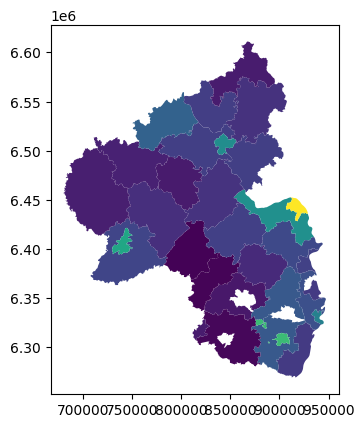

In [3]:
rheinland_pfalz = gpd.read_file("SHP_BTW2025/23_LK_1_BTW2025.shp")
rheinland_pfalz.to_crs(zensus_1km_rlp.crs, inplace=True)

zensus_landkreise_rlp = zensus_landkreise_geo.clip(rheinland_pfalz)

zensus_landkreise_rlp.plot(column="GRUENE_Anteil")

In [4]:
intensive_cols = [
 'Biomasse/Biogas',
 'Personen 18 - 29 Jahre',
 'Personen 30 - 49 Jahre',
 'Gebäude ab 1949 bis 1978',
 'Blockheizung',
 'Durchschnittliche Nettokaltmiete/qm',
 'Heizöl',
 'Einzel-/ Mehrraumöfen',
 'Einwohner',
 'Zentralheizung',
 'Durchschnittliche Haushaltsgröße',
 'Fernwärme',
 'kein Energieträger',
 'Solar/Geothermie/Wärmepumpe',
 'Gebäude ab 2001 bis 2010',
 'Gebäude ab 2011 bis 2019',
 'Ausländeranteil',
 'Etagenheizung',
 'Personen 65 Jahre und älter',
 'Personen 50 - 64 Jahre',
 'Gebäude ab 1919 bis 1948',
 'Strom',
 'Leerstandsquote',
 'Gas',
 'Kohle',
 'Gebäude ab 1979 bis 1990',
 'Fernheizung',
 'Gebäude ab 2020 und später',
 'Eigentümerquote',
 'Gebäude ab 1991 bis 2000',
 'Holz/Holzpellets', "GRUENE_Anteil"]

extensive_cols = ["Einwohnerdichte", "GRUENE"]


/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: GRUENE, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Biomasse/Biogas, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Personen 18 - 29 Jahre, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Personen 30 - 49 Jahre, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patri

<Axes: >

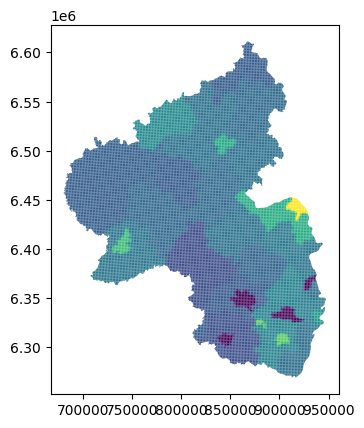

In [6]:
test1 = area_interpolate(source_df = zensus_landkreise_geo, 
                         target_df=zensus_1km_rlp, n_jobs=3, 
                         intensive_variables=intensive_cols,
                         extensive_variables=extensive_cols)

test1.plot(column="GRUENE_Anteil")

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:135: RuntimeWarning: divide by zero encountered in scalar divide
  correct = (val - nansum(data[mask])) / mask.sum()
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  correct = val / nansum(data[mask])
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:135: RuntimeWarning: divide by zero encountered in scalar divide
  correct = (val - nansum(data[mask])) / mask.sum()
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  correct = val / nansum(data[mask])
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:135: Ru

<Axes: >

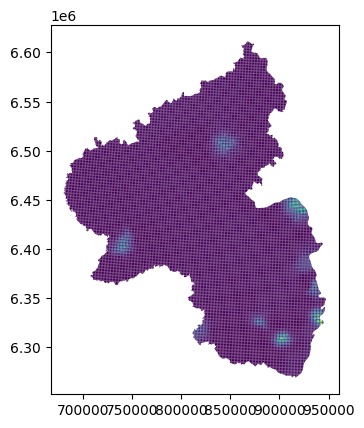

In [9]:

test2 = pycno_interpolate(source_df = zensus_landkreise_rlp, 
                         target_df=zensus_1km_rlp, 
                         variables= intensive_cols+extensive_cols, cellsize=1000)

test2.plot(column="GRUENE_Anteil")

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

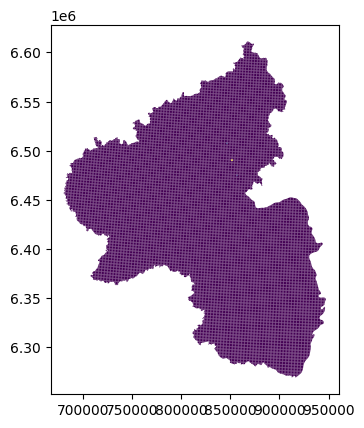

In [6]:
geo_spalten = ['Shape_Leng', 'Shape_Area', 'geometry']
covariates = extensive_cols + intensive_cols + geo_spalten
covariates.remove("GRUENE_Anteil") # Im Verhaeltnis mit der zu erklaerenden Variable, nicht im Zensus-1km-Datensatz enthalten
covariates.remove("Kohle") # Viele NAs
covariates.remove("Biomasse/Biogas") # # Viele NAs

test3, model = glm(source_df = zensus_landkreise_geo[covariates].dropna(), target_df = zensus_1km_rlp, 
                   variable="GRUENE",
                   raster="rasterdaten/rasterdaten_clipped.tif", likelihood = "poisson", return_model=True)


test3.plot(column="GRUENE")

Auffällig ist, dass wir überhaupt keine große farbliche Hervorhebung (auch nicht um Mainz herum) haben - dort, wo auf den Quadratkilometer eigentlich relativ viele Grünen-Wähler kommen sollten (absolut und auch relativ hohe Zahlen wären zu erwarten gewesen, da die Bevölkerungsdichte im Rhein-Main-Gebiet ja auch hoch ist). Daher lässt sich die Modell-Qualität in Zweifel ziehen.

In [25]:
model.summary()

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: overflow encountered in exp
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 GRUENE   No. Observations:                   19
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0695e+05
Date:                Sun, 09 Nov 2025   Deviance:                   4.1369e+05
Time:                        09:44:22   Pearson chi2:                 3.85e+07
No. Iterations:                     8   Pseudo R-squ. (CS):               -inf
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
np.log1p(Type_21)     4.3588      0.009    481.928      0.000       4.341       4.377
np.log1p(Type_22)     4.1854      0.010    408.653      0.000       4.165       4.205
np.log1p(Type_23)    -4.2241      0.014   -303.111      0.000      -4.251      -4.197
np.log1p(Type_24)    -1.7959      0.011   -170.125      0.000      -1.817      -1.775
np.log1p(Type_41)     5.3988      0.016    334.965      0.000       5.367       5.430
np.log1p(Type_42)    -1.2036      0.007   -175.643      0.000      -1.217      -1.190
np.log1p(Type_52)    -3.2447      0.013   -253.440      0.000      -3.270      -3.220
=====================================================================================
"""

Offensichtlich hat das automatische Modell viele Beobachtungen herausgeworfen. Wir sollten uns daher auf andere Analysen fokussieren.

In [7]:
# Dasselbe Problem mit der perfekten Kollinearitaet
# wie im absoluten Fall
ars = 'Amtlicher Regionalschlüssel (ARS)__Code'
colinear = ['Personen unter 18 Jahren', 'keine Heizung', 'kein Energieträger', 'Gebäude vor 1919']
covariates2 = covariates.copy()
covariates2.remove("GRUENE")
for col in colinear:
    if col in covariates2:
        covariates2.remove(col)
for col in geo_spalten:
    if col in covariates2:
        covariates2.remove(col)

df = zensus_landkreise_geo[covariates2+["GRUENE_Anteil",ars]].dropna()
encoder = OneHotEncoder(sparse_output=False,min_frequency=7).fit(zensus_landkreise_geo[[ars]] // 1000)
encoded = encoder.transform(df[[ars]] // 1000)
encoded_rlp = encoder.transform(np.ones((zensus_1km_rlp.shape[0],1))*7) # hier gibt es ein paar Ungenaugikeiten, das betrifft aber
# angrenzende Landkreise aus anderen Bundeslaendern

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [121]:

model = betareg.BetaModel(endog = df["GRUENE_Anteil"].to_numpy(), 
                        exog = np.concat([encoded, df[covariates2]], axis=1), 
                        exog_precision=np.ones((df.shape[0],1)))
result = model.fit()
zensus_1km_rlp["prediction"] = result.predict(
    exog_precision=np.ones((zensus_1km_rlp.shape[0],1)),
    exog=np.concat([encoded_rlp, zensus_1km_rlp[covariates2]], 
              axis=1))

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [122]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              BetaModel Results                               
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                 1107.8
Model:                      BetaModel   AIC:                            -2130.
Method:            Maximum Likelihood   BIC:                            -1960.
Date:                Mon, 10 Nov 2025                                         
Time:                        09:53:53                                         
No. Observations:                 377                                         
Df Residuals:                     334                                         
Df Model:                          41                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
x1              1.6382      1.308      1.253      0.210      -0.925       4.201
x2              1.6220      1.305      1.243      0.214      -0.936       4.180
x3              1.5433      1.298      1.189      0.234      -1.000       4.087
x4              1.6860      1.298      1.299      0.194      -0.858       4.230
x5              1.6218      1.291      1.256      0.209      -0.909       4.153
x6              1.9460      1.293      1.505      0.132      -0.588       4.480
x7              1.8145      1.297      1.399      0.162      -0.727       4.356
x8              1.2397      1.315      0.943      0.346      -1.338       3.817
x9              0.9607      1.313      0.732      0.464      -1.613       3.534
x10             1.1549      1.315      0.878      0.380      -1.422       3.732
x11             0.9941      1.312      0.758      0.449      -1.577       3.565
x12             0.9426      1.307      0.721      0.471      -1.618       3.503
x13             1.6292      1.309      1.244      0.213      -0.937       4.196
x14          7.635e-05   2.93e-05      2.610      0.009     1.9e-05       0.000
x15             0.0576      1.266      0.045      0.964      -2.424       2.539
x16            -6.3160      1.705     -3.705      0.000      -9.657      -2.975
x17            -1.6669      0.318     -5.237      0.000      -2.291      -1.043
x18            -8.5175      2.952     -2.885      0.004     -14.304      -2.731
x19             0.1434      0.014     10.581      0.000       0.117       0.170
x20            10.3121      2.656      3.882      0.000       5.106      15.518
x21           -10.7154      3.058     -3.504      0.000     -16.709      -4.722
x22          7.029e-08   6.75e-08      1.041      0.298   -6.21e-08    2.03e-07
x23            -7.5481      2.988     -2.526      0.012     -13.404      -1.692
x24            -0.5521      0.178     -3.097      0.002      -0.902      -0.203
x25             1.3075   6.87e+04    1.9e-05      1.000   -1.35e+05    1.35e+05
x26            10.9949      2.850      3.858      0.000       5.409      16.580
x27            -0.0423      1.035     -0.041      0.967      -2.071       1.987
x28            -0.8553      1.241     -0.689      0.491      -3.287       1.576
x29            -3.6440      0.464     -7.861      0.000      -4.553      -2.735
x30            -7.2402      2.963     -2.444      0.015     -13.047      -1.434
x31            -4.3869      1.480     -2.965      0.003      -7.287      -1.487
x32            -5.1559      1.879     -2.743      0.006      -8.840      -1.472
x33            -1.9682      0.508     -3.874      0.000      -2.964      -0.972
x34            12.6515      2.842      4.452      0.000       7.082      18.221
x35            -7.7723      1.100     -7.067      0.000      -9.928      -5.617
x36            10.1630      2.644      3.844      0.000       4.981      15.345
x37            -1.3124      0.675     -1.9

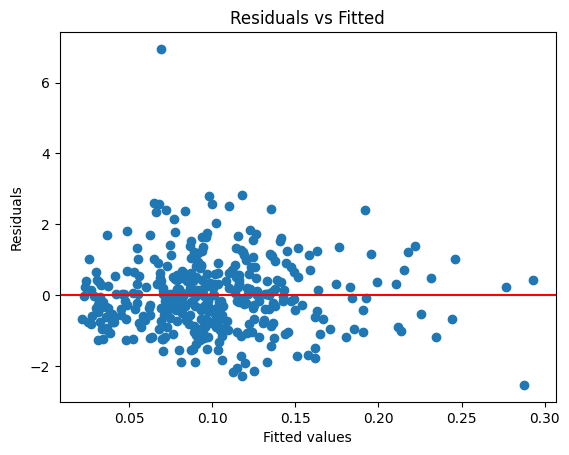

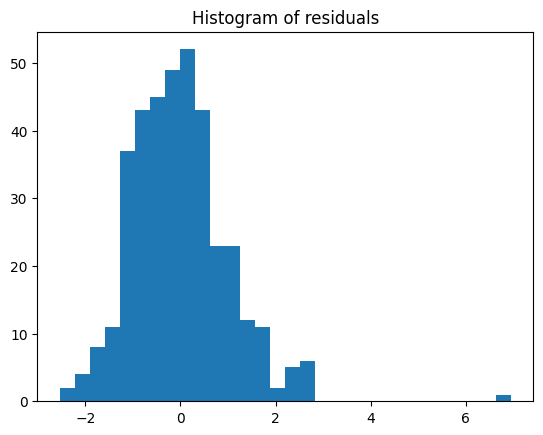

In [123]:
resid = result.resid_pearson  # oder model.resid_pearson für Pearson-Residuals
fitted = result.fittedvalues

plt.scatter(fitted, resid)
plt.axhline(0, color="red")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

plt.hist(resid, bins=30)
plt.title("Histogram of residuals")
plt.show()

In [15]:
log_covariates = ["Einwohnerdichte", "Einwohner"]
no_log = covariates2.copy()
precision = "Einwohner"
for col in log_covariates:
    no_log.remove(col)


X = np.concat([encoded, df[no_log], np.log(df[log_covariates])], axis = 1)
X_rlp = np.concat([encoded_rlp, zensus_1km_rlp[no_log], np.log(zensus_1km_rlp[log_covariates])], axis=1)
model2 = betareg.BetaModel(endog = df["GRUENE_Anteil"].to_numpy(), 
                        exog = X, 
                        exog_precision= np.ones((df.shape[0],1)))
result2 = model2.fit()


In [16]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              BetaModel Results                               
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                 1108.6
Model:                      BetaModel   AIC:                            -2131.
Method:            Maximum Likelihood   BIC:                            -1962.
Date:                Mon, 10 Nov 2025                                         
Time:                        10:38:55                                         
No. Observations:                 377                                         
Df Residuals:                     334                                         
Df Model:                          41                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
x1              2.0404      4.575      0.446      0.656      -6.927      11.008
x2              2.0387      4.580      0.445      0.656      -6.938      11.015
x3              1.9332      4.577      0.422      0.673      -7.039      10.905
x4              2.0655      4.582      0.451      0.652      -6.915      11.046
x5              2.0253      4.573      0.443      0.658      -6.937      10.988
x6              2.3001      4.595      0.501      0.617      -6.706      11.306
x7              2.2171      4.590      0.483      0.629      -6.780      11.214
x8              1.6212      4.577      0.354      0.723      -7.349      10.591
x9              1.3421      4.569      0.294      0.769      -7.613      10.297
x10             1.4710      4.591      0.320      0.749      -7.527      10.469
x11             1.3467      4.571      0.295      0.768      -7.612      10.306
x12             1.2914      4.560      0.283      0.777      -7.646      10.228
x13             1.9886      4.583      0.434      0.664      -6.995      10.972
x14             0.2814      1.448      0.194      0.846      -2.556       3.119
x15            -5.7798      2.097     -2.757      0.006      -9.889      -1.670
x16            -1.8271      0.330     -5.533      0.000      -2.474      -1.180
x17            -9.4185      4.881     -1.930      0.054     -18.985       0.148
x18             0.1484      0.013     11.019      0.000       0.122       0.175
x19             9.4266      2.765      3.409      0.001       4.007      14.846
x20           -11.1041      5.141     -2.160      0.031     -21.180      -1.028
x21            -8.2073      4.882     -1.681      0.093     -17.776       1.361
x22            -0.6065      0.180     -3.367      0.001      -0.960      -0.253
x23             0.5425    6.7e+04   8.09e-06      1.000   -1.31e+05    1.31e+05
x24             9.7686      2.940      3.322      0.001       4.006      15.531
x25            -0.7111      1.018     -0.699      0.485      -2.706       1.284
x26            -0.6652      1.233     -0.539      0.590      -3.082       1.752
x27            -3.3703      0.441     -7.641      0.000      -4.235      -2.506
x28            -7.9443      4.871     -1.631      0.103     -17.491       1.602
x29            -4.0085      1.689     -2.373      0.018      -7.320      -0.697
x30            -4.7327      2.034     -2.327      0.020      -8.718      -0.747
x31            -1.9314      0.483     -3.997      0.000      -2.879      -0.984
x32            11.7796      2.947      3.997      0.000       6.004      17.555
x33            -7.8228      1.124     -6.963      0.000     -10.025      -5.621
x34             9.2831      2.756      3.368      0.001       3.881      14.685
x35            -1.7159      0.697     -2.462      0.014      -3.082      -0.350
x36             0.5425    6.7e+04   8.09e-06      1.000   -1.31e+05    1.31e+05
x37           -12.6492      3.897     -3.2

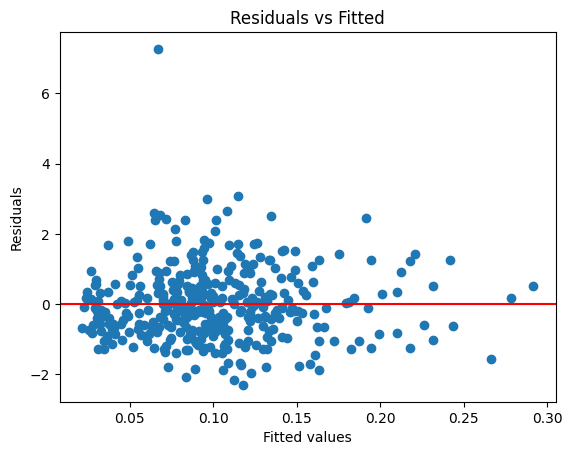

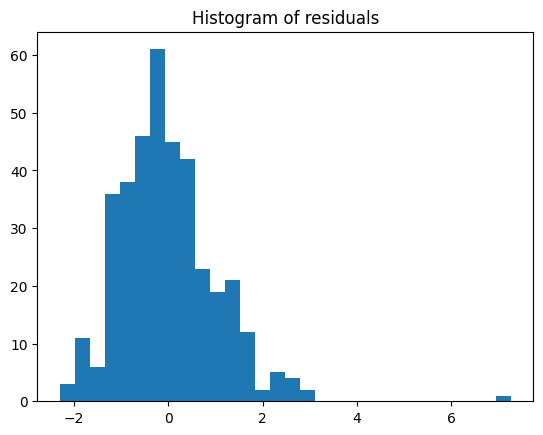

In [17]:
resid = result2.resid_pearson  # oder model.resid_pearson für Pearson-Residuals
fitted = result2.fittedvalues

plt.scatter(fitted, resid)
plt.axhline(0, color="red")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

plt.hist(resid, bins=30)
plt.title("Histogram of residuals")
plt.show()

Das zweite Modell reduziert also zumindest das stark negative Residuum und hat einen leicht höheren BIC.

In [18]:
zensus_1km_rlp["prediction2"] = result2.predict(
    exog_precision=np.ones((zensus_1km_rlp.shape[0],1)),
    exog=X_rlp)

In [44]:
X = np.concat([encoded, np.log(df[log_covariates+no_log])], axis = 1)
X_rlp = np.concat([encoded_rlp, np.log(zensus_1km_rlp[log_covariates+no_log])], axis=1)
model3 = betareg.BetaModel(endog = df["GRUENE_Anteil"].to_numpy(), 
                        exog = X, 
                        exog_precision= np.ones((df.shape[0],1)))
result3 = model3.fit()
print(result3.summary())


                              BetaModel Results                               
Dep. Variable:                      y   Log-Likelihood:                 1114.4
Model:                      BetaModel   AIC:                            -2143.
Method:            Maximum Likelihood   BIC:                            -1974.
Date:                Mon, 10 Nov 2025                                         
Time:                        10:56:37                                         
No. Observations:                 377                                         
Df Residuals:                     334                                         
Df Model:                          41                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
x1            -10.9152      1.890     -5.775      0.000     -14.620      -7.211
x2            -10.8763      1.890     -5.754     

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


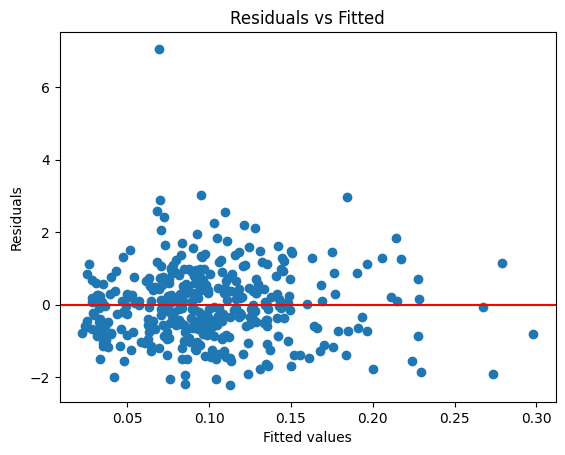

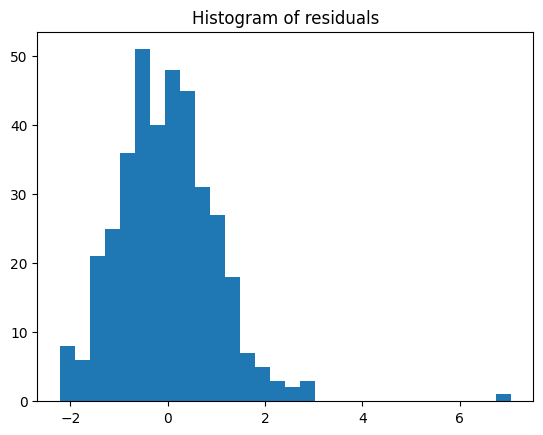

In [45]:
resid = result3.resid_pearson  # oder model.resid_pearson für Pearson-Residuals
fitted = result3.fittedvalues

plt.scatter(fitted, resid)
plt.axhline(0, color="red")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

plt.hist(resid, bins=30)
plt.title("Histogram of residuals")
plt.show()

Zwischen dem 2. und 3. Modell gibt es nochmals eine leichte Verbesserung. Wir sollten also alle Kovariaten logarithmieren.

In [21]:
zensus_1km_rlp["prediction3"] = result3.predict(
    exog_precision=np.ones((zensus_1km_rlp.shape[0],1)),
    exog=X_rlp)

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/statsmodels/othermod/betareg.py:188: RuntimeWarning: invalid value encountered in dot
  linpred = np.dot(exog, params_mean)


<Axes: >

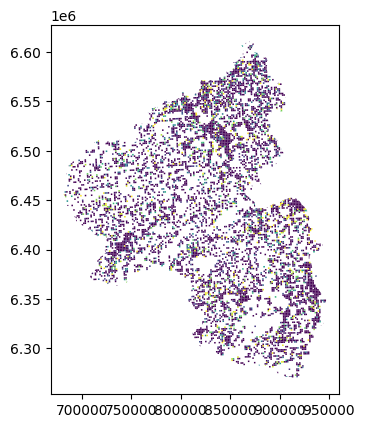

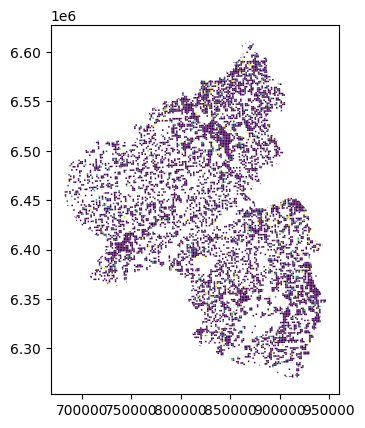

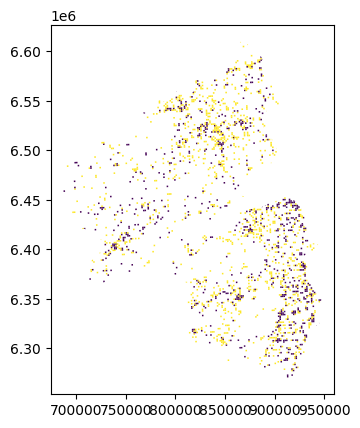

In [131]:
zensus_1km_rlp.plot("prediction")
zensus_1km_rlp.plot("prediction2")
zensus_1km_rlp.plot("prediction3")

In [34]:
result3.summary(xname = ["intercept"] + [f"bundesland_{x}" for x in range(encoded.shape[1])] + log_covariates+no_log)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              BetaModel Results                               
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                 1114.4
Model:                      BetaModel   AIC:                            -2143.
Method:            Maximum Likelihood   BIC:                            -1974.
Date:                Mon, 10 Nov 2025                                         
Time:                        10:47:01                                         
No. Observations:                 377                                         
Df Residuals:                     334                                         
Df Model:                          41                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
intercept                             -10.9152      1.890     -5.775      0.000     -14.620      -7.211
bundesland_0                          -10.8763      1.890     -5.754      0.000     -14.581      -7.172
bundesland_1                          -10.9939      1.893     -5.807      0.000     -14.704      -7.283
bundesland_2                          -10.8181      1.889     -5.727      0.000     -14.520      -7.116
bundesland_3                          -10.8333      1.882     -5.756      0.000     -14.522      -7.144
bundesland_4                          -10.6701      1.887     -5.654      0.000     -14.369      -6.971
bundesland_5                          -10.7620      1.878     -5.730      0.000     -14.443      -7.081
bundesland_6                          -11.8368      1.894     -6.249      0.000     -15.549      -8.124
bundesland_7                          -11.9541      1.894     -6.311      0.000     -15.666      -8.242
bundesland_8                          -12.0368      1.914     -6.290      0.000     -15.788      -8.286
bundesland_9                          -12.0390      1.901     -6.334      0.000     -15.765      -8.314
bundesland_10                         -12.0477      1.890     -6.376      0.000     -15.751      -8.344
bundesland_11                         -10.9013      1.881     -5.796      0.000     -14.587      -7.215
bundesland_12                           0.0953      0.028      3.371      0.001       0.040       0.151
Einwohnerdichte                         0.0507      0.020      2.553      0.011       0.012       0.090
Einwohner                               0.2760      0.197      1.398      0.162      -0.111       0.663
Personen 18 - 29 Jahre                 -1.4613      0.501     -2.917      0.004      -2.443      -0.480
Personen 30 - 49 Jahre                 -0.4933      0.099     -4.975      0.000      -0.688      -0.299
Gebäude ab 1949 bis 1978               -0.0299      0.017     -1.768      0.077      -0.063       0.003
Blockheizung                            1.1778      0.109     10.812      0.000       0.964       1.391
Durchschnittliche Nettokaltmiete/qm     0.0614      0.028      2.160      0.031       0.006       0.117
Heizöl                                 -0.1901      0.041     -4.648      0.000      -0.270      -0.110
Einzel-/ Mehrraumöfen                  -0.0256      0.116     -0.220      0.826      -0.254       0.203
Zentralheizung                         -0.9587      0.365     -2.630      0.009      -1.673      -0.244
Durchschnittliche Haushaltsgröße        0.0054   2.78e+05   1.93e-08      1.000   -5.45e+05    5.45e+05
Fernwärme                               0.0819      0.040      2.045      0.041       0.003       0.160
Solar/Geothermie/Wärmepumpe             0.0056      0.082      0.068      0.945      -0.154       0.165
Gebäude ab 2001 bis 2010               -0.

In [46]:
# Brutal keine Signifikanz haben 
not_significant = ["Durchschnittliche Haushaltsgröße", "Gebäude ab 1979 bis 1990", "Etagenheizung", 
                   "Einzel-/ Mehrraumöfen", "Solar/Geothermie/Wärmepumpe", "Leerstandsquote", "Eigentümerquote"]
no_log2 = no_log.copy()
for col in not_significant:
    no_log2.remove(col)

In [49]:
X = np.concat([encoded, np.log(df[log_covariates+no_log2])], axis = 1)
X_rlp = np.concat([encoded_rlp, np.log(zensus_1km_rlp[log_covariates+no_log2])], axis=1)
model4 = betareg.BetaModel(endog = df["GRUENE_Anteil"].to_numpy(), 
                        exog = X, 
                        exog_precision= np.ones((df.shape[0],1)))
result4 = model4.fit()
print(result4.summary(xname = ["intercept"] + [f"bundesland_{x}" for x in range(encoded.shape[1])] + log_covariates+no_log2))
zensus_1km_rlp["prediction4"] = result4.predict(
    exog_precision=np.ones((zensus_1km_rlp.shape[0],1)),
    exog=X_rlp)

                              BetaModel Results                               
Dep. Variable:                      y   Log-Likelihood:                 1069.7
Model:                      BetaModel   AIC:                            -2067.
Method:            Maximum Likelihood   BIC:                            -1926.
Date:                Mon, 10 Nov 2025                                         
Time:                        10:59:29                                         
No. Observations:                 377                                         
Df Residuals:                     341                                         
Df Model:                          34                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
intercept                              -6.0210      1.881     -3.201      0.001  

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/statsmodels/othermod/betareg.py:188: RuntimeWarning: invalid value encountered in dot
  linpred = np.dot(exog, params_mean)


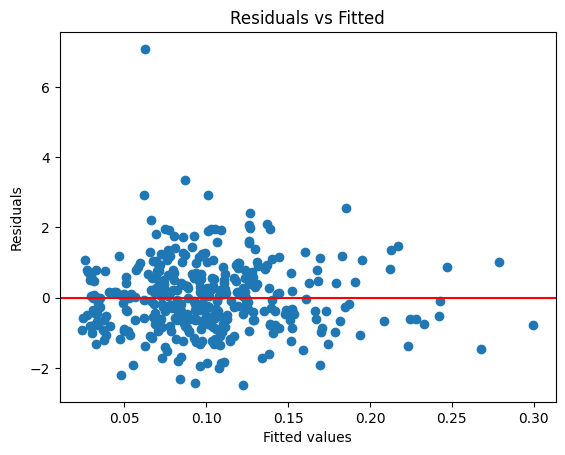

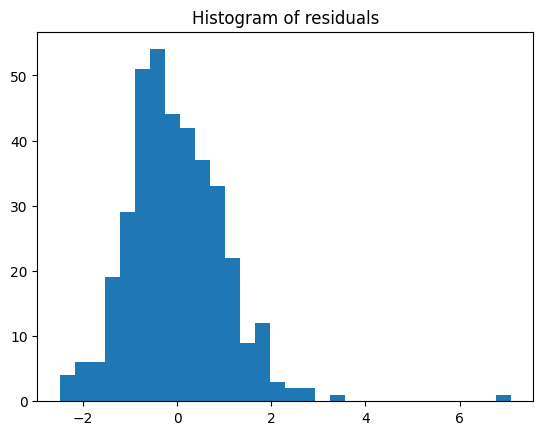

In [48]:
resid = result4.resid_pearson  # oder model.resid_pearson für Pearson-Residuals
fitted = result4.fittedvalues

plt.scatter(fitted, resid)
plt.axhline(0, color="red")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

plt.hist(resid, bins=30)
plt.title("Histogram of residuals")
plt.show()

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: prediction4, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")


<Axes: >

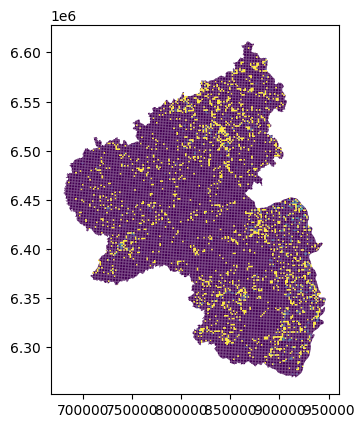

In [54]:
test4 = area_interpolate(zensus_1km_rlp, zensus_1km_rlp, intensive_variables=["prediction4"])
test4.plot(column="prediction4")

In [135]:

bounds = [[49.39, 6.1], [50.57, 7.6]]
m = folium.Map(location=[49.9, 7.0], zoom_start=8, max_bounds=True)
m.fit_bounds(bounds)

# Erstelle eine Farbskala (colormap) für die Werte zwischen 0 und 1

colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'], vmin=0, vmax=1)

# Funktion, um für jeden Eintrag die Farbe nach Attributwert zu bestimmen
def style_function(feature):
    val = feature['properties']['prediction3']
    return {
        'fillColor': colormap(val),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }

# Füge GeoJSON-Layer mit Tooltip zur Karte hinzu, Tooltip zeigt Attribut beim Hover
tooltip = GeoJsonTooltip(fields=['prediction3'],
                         aliases=['Stimmanteil:'],
                         localize=True)

folium.GeoJson(
    test4,
    style_function=style_function,
    tooltip=tooltip
).add_to(m)

# Füge eine Legende (Colorbar) hinzu
colormap.caption = 'Geschätzter Stimmanteil - GRÜNE'
colormap.add_to(m)

m.save("karte_1km_grid_rlp3.html")

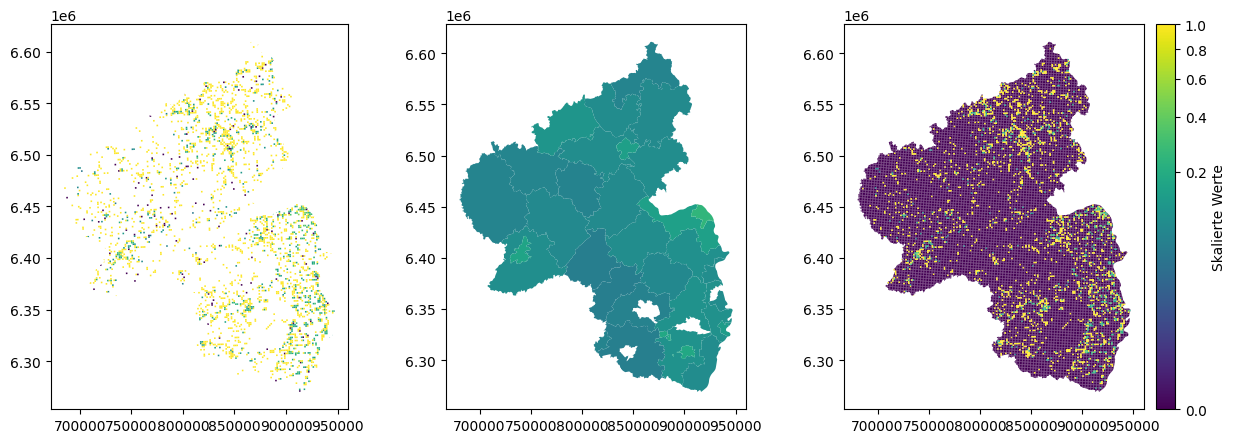

In [56]:
var = "prediction4"

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Gemeinsame Normierung über alle Plots definieren (min/max aller Daten, z.B. aus deinen Spalten)
vmin = min(
    zensus_1km_rlp[var].min(),
    zensus_landkreise_rlp['GRUENE_Anteil'].min(),
    test4[var].min()
)
vmax = max(
    zensus_1km_rlp[var].max(),
    zensus_landkreise_rlp['GRUENE_Anteil'].max(),
    test4[var].max()
)

# Farbnorm erstellen
#norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
norm = mpl.colors.PowerNorm(gamma=0.3, vmin=0, vmax=1)  # gamma < 1 betont kleine Werte mehr

cmap = 'viridis'  # oder auf deinen Wunsch anpassen

# Erster Plot ohne eigene Farbskala, nur Kolorierung
zensus_1km_rlp.plot(column=var, cmap=cmap, norm=norm, ax=axes[0], legend=False)

# Zweiter Plot
zensus_landkreise_rlp.plot(column="GRUENE_Anteil", cmap=cmap, norm=norm, ax=axes[1], legend=False)

# Dritter Plot
test4.plot(column=var, cmap=cmap, norm=norm, ax=axes[2], legend=False)

# Gemeinsame Colorbar erstellen für die ganze Figur
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Dummy Array nötig für Colorbar

cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.01)
cbar.set_label('Skalierte Werte')

plt.show()


In [138]:
bounds_trier = [[49.70, 6.60], [49.85, 6.80]]
m_trier = folium.Map(location=[49.77, 6.67], zoom_start=13)
m_trier.fit_bounds(bounds_trier)

# Gefilterte GeoJSON (nur Quadrate/Straßenzüge von Trier)
folium.GeoJson(
    test4,  
    style_function=style_function,
    tooltip=tooltip
).add_to(m_trier)

# Füge GeoJSON-Layer mit Tooltip zur Karte hinzu, Tooltip zeigt Attribut beim Hover
tooltip = GeoJsonTooltip(fields=['prediction3'],
                         aliases=['Stimmanteil:'],
                         localize=True)

folium.GeoJson(
    test4,
    style_function=style_function,
    tooltip=tooltip
).add_to(m_trier)

# Füge eine Legende (Colorbar) hinzu
colormap.caption = 'Geschätzter Stimmanteil - GRÜNE'
colormap.add_to(m_trier)

In [ ]:
from pyrosm import get_data, OSM

bbox = [6.63, 49.72, 6.71, 49.79] # Trier
osm = OSM("rheinland-pfalz-251020.osm.pbf", bounding_box=bbox)
roads = osm.get_network(network_type="driving") 
roads = roads.to_crs(zensus_1km_rlp.crs)

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


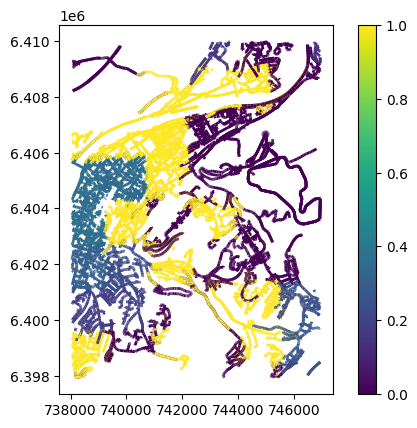

In [57]:
# nach Attribut einfärben
joined = gpd.sjoin(roads, test4, predicate='intersects')
joined.plot(column='prediction4', legend=True, linewidth=2)
plt.show()

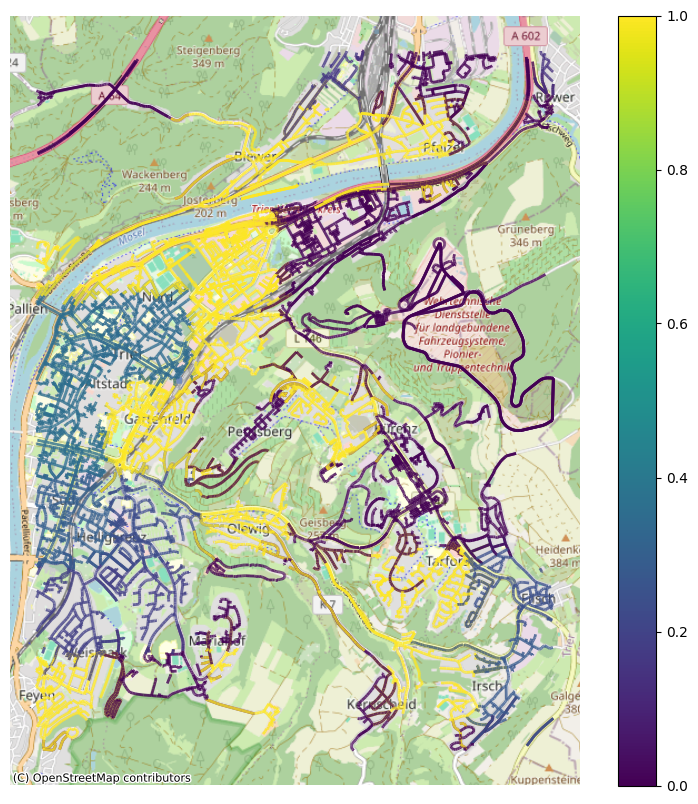

In [59]:
import contextily as ctx

joined = joined.to_crs(epsg=3857)

# Plot erstellen
ax = joined.plot(column='prediction4', legend=True, linewidth=2, figsize=(10, 10), cmap='viridis', alpha=0.8)

# OpenStreetMap als Hintergrundkarte hinzufügen
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()  # optionale Achsen-Ausblendung
plt.show()